--- 
title: Practice 6.1
author: Isabelle Antaran
format:
    html:
        toc: true
        code-fold: true
        embed-resources: true
theme: flatly
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [121]:
!pip install palmerpenguins

In [132]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from plotnine import *

In [131]:
# Code Here
from palmerpenguins import load_penguins 
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


The variables that we need to dummify are species, sex, and island.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [134]:
penguins = penguins[penguins['bill_depth_mm'].notna()] 
penguins['x2'] = penguins['bill_length_mm'] ** 2
penguins['x3'] = penguins['bill_length_mm'] ** 3
penguins['x4'] = penguins['bill_length_mm'] ** 4
penguins['x5'] = penguins['bill_length_mm'] ** 5
penguins['x6'] = penguins['bill_length_mm'] ** 6
penguins['x7'] = penguins['bill_length_mm'] ** 7
penguins['x8'] = penguins['bill_length_mm'] ** 8
penguins['x9'] = penguins['bill_length_mm'] ** 9
penguins['x10'] = penguins['bill_length_mm'] ** 10

In [135]:
#Linear
y= penguins["bill_depth_mm"]
X= penguins[["bill_length_mm"]]
lr= LinearRegression()
lr_fit = lr.fit(X,y)
y_pred_lr = lr_fit.predict(penguins[["bill_length_mm"]])
penguins["pred_for_x"] =y_pred_lr

In [136]:
#Quadratic 
y= penguins["bill_depth_mm"]
X2= penguins[["bill_length_mm", "x2"]]

lr_fit2 = lr.fit(X2, y)
y_pred_lr2 = lr_fit2.predict(penguins[["bill_length_mm", "x2"]])
penguins["pred_for_x2"] = y_pred_lr2

In [137]:
#Cubic 
y= penguins["bill_depth_mm"]
X3= penguins[["bill_length_mm", "x2", "x3"]]

lr_fit3 = lr.fit(X3, y)
y_pred_lr3 = lr_fit3.predict(penguins[["bill_length_mm", "x2", "x3"]])
penguins["pred_for_x3"] = y_pred_lr3

In [138]:
#Degree 10
y = penguins["bill_depth_mm"]
X10 = penguins[["bill_length_mm", "x2","x3","x4","x5","x6","x7","x8","x9","x10"]]

lr_fit_big = lr.fit(X10, y)

y_pred_lr10 = lr_fit_big.predict(penguins[["bill_length_mm", "x2","x3","x4","x5","x6","x7","x8","x9","x10"]])

penguins['pred_for_x10'] = y_pred_lr10

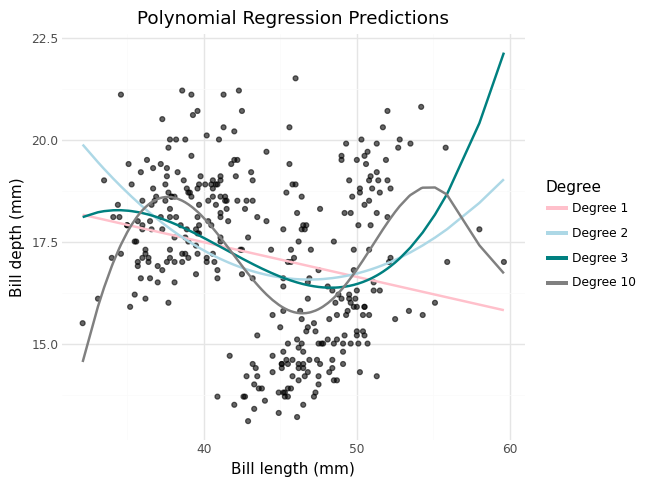

In [139]:
#Plot 
(ggplot(penguins,
    aes(x = 'bill_length_mm', y = 'bill_depth_mm'))
    + geom_point(color= "black", alpha = 0.6)
    + geom_line(aes(y = 'pred_for_x', color = '"Degree 1"'), size= 1)
    + geom_line(aes(y = 'pred_for_x2', color = '"Degree 2"'), size= 1)
    + geom_line(aes(y = 'pred_for_x3', color = '"Degree 3"'), size= 1)
    + geom_line(aes(y = 'pred_for_x10', color = '"Degree 10"'), size= 1)
    + labs(title= "Polynomial Regression Predictions",
        x= "Bill length (mm)",
        y= "Bill depth (mm)")
    + scale_color_manual(name ="Degree", values = {"Degree 1": "pink", "Degree 2": "lightblue", "Degree 3": "teal", "Degree 10": "grey"})
    + theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

As illustrated in the plot above, the models that underfit are x an x^2.
These linear and quadratic models underfit as they do not capture the relationship and patterns of the graph.
The model that is overfitting is model 10, as it considers even the small noise in this particular dataset; therefore, this model's predictions might not be generalizable to another set of data. 
Among the models, the model that may fit it best is x^3. This takes into account the trends without overfitting to our model.